In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Loading the dataset
data=pd.read_csv('Mall_Customers.csv')

# Data Exploration

In [3]:
# Returns number of rows and columns of the dataset
data.shape

(200, 5)

In [4]:
# Returns an object with all of the column headers 
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Returns the first x number of rows when head(x). Without a number it returns 5
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Returns the last x number of rows when tail(x). Without a number it returns 5
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
# Returns basic information on all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Returns basic statistics on numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
# Returns true for a column having null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Gender plot

Text(0, 0.5, 'Count')

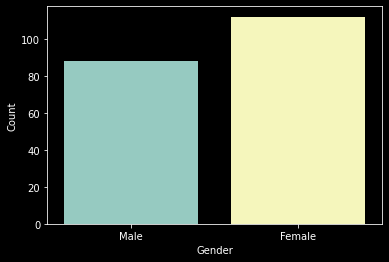

In [13]:
# Visualising the columns 'Gender' using Countplot
import seaborn as sns
sns.countplot(x='Gender', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')

### Gender plot - Observation

From the Count plot it is observed that the number of Female customers are more that the total number of Male customers.

# Age plot

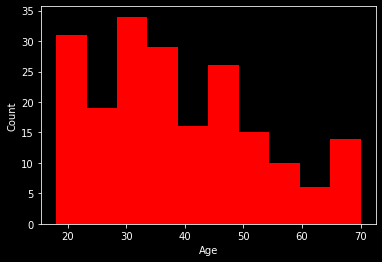

In [14]:
# Visualising the columns 'Age' using Histogram
plt.hist(x=data['Age'], bins=10, orientation='vertical', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Age plot - Observation

From the Histogram it is evident that there are 3 age groups that are more frequently shop at the mall, they are: 15-22 years, 30-40 years and 45-50 years.

# Age vs Spending Score

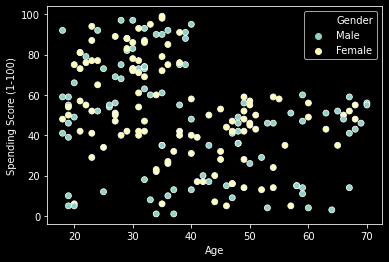

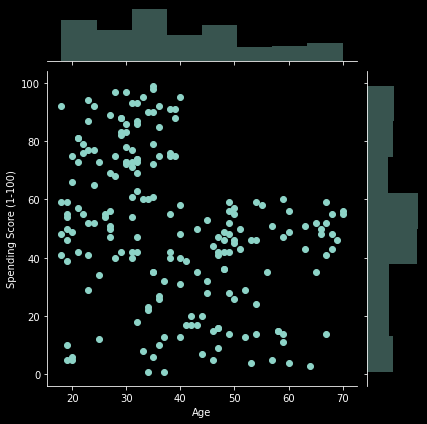

In [15]:
# Visualising the columns 'Age', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=data, x='Age', y='Spending Score (1-100)')

# Annual Income vs Spending Score

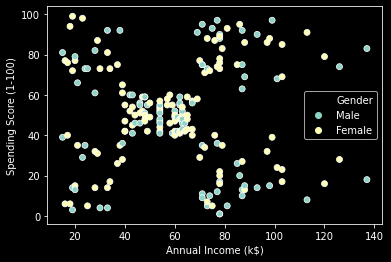

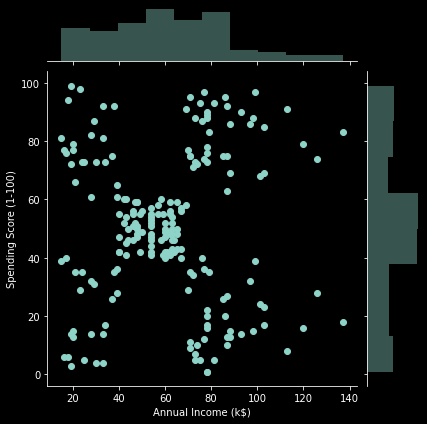

In [16]:
# Visualising the columns 'Annual Income (k$)', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')

### Annual Income Vs Spending Score - Observation

From the Annual Income Vs Spending Score plot we observe that there are 5 clusters and can be categorised as:

a. High Income, High Spending Score (Top Right Cluster)

b. High Income, Low Spending Score (Bottom Right Cluster)

c. Average Income, Average Spending Score (Center Cluster)

d. Low Income, High Spending Score (Top Left Cluster)

e. Low Income, Low Spending Score (Bottom Left Cluster)

# Data Pre-processing

In [17]:
# Selecting 'Annual Income' and 'Spending Score' as the features for clustering
# we are performing Clustering for Annual Income and Spending Score
# so, we take the features
x=data.iloc[:,[3,4]].values


In [19]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Model Building

# 1)K-Means Algorithm

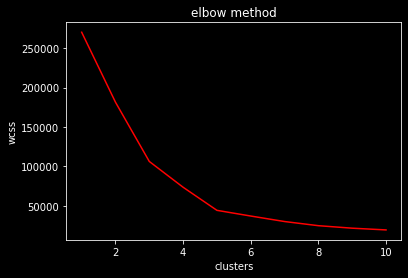

In [20]:
#elbow method to find the number of clusters
from sklearn.cluster import KMeans
wcss=[]#within clusters sum of the squares, created and empty list to apply for loop ans store different clusters s
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0,max_iter=100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='red')    
plt.title("elbow method")
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

#n_clusters-- no. of clusters
    #init- initilaize and pass
    #k-means++- to save from random initialize trap
    #random_state=0, to not get different outputs
    
    #inertia_ is the formula used to segregate the data points into clusters
    
    # from the below we take number of clusters=5

In [21]:
#implementing KMeans Algorithm
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0,max_iter=100)
y_kmeans=kmeans.fit_predict(x)
y_kmeans



#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

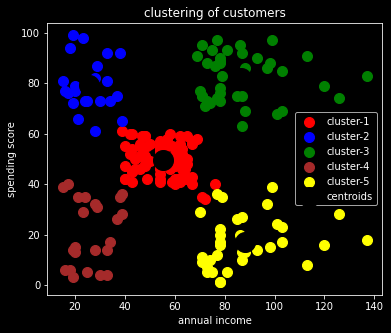

In [22]:
#visualizing the clusters
#Now we perform visualization
#plt.scatter(X,Y)
#here in x we have, Annual Income (k$) and Spending Score (1-100)
#c-color, s-size,

plt.figure(figsize=(6,5))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster-1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster-2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster-3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='brown',label='cluster-4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='yellow',label='cluster-5')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='black',label='centroids')
plt.title('clustering of customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()
#in y_kmeans our clustered formed and stored, so what we have done 
            #X[y_kmeans == 0, 0]- Annual Income if y_kmeans==0, give o value
            #X[y_kmeans == 1, 0]- Annual Income, if y_means==1, give 0 value
            #X[y_kmeans == 2, 0]- Annual Income, if y_means==2, give 0 value
            #X[y_kmeans == 3, 0]- Annual Income, if y_means==3, give 0 value
            #X[y_kmeans == 4, 0]- Annual Income, if y_means==4, give 0 value
            
          # X[y_kmeans == 0, 1] - Spending Score (1-100)   if  y_means==0, give 1 value    
            #X[y_kmeans == 1, 0]-Spending Score (1-100), if y_means==1, give 1 value
            #X[y_kmeans == 2, 0]-Spending Score (1-100), if y_means==1, give 1 value
            #X[y_kmeans == 3, 0]- Spending Score (1-100), if y_means==1, give 1 value
            #X[y_kmeans == 4, 0]-Spending Score (1-100), if y_means==1, give 1 value
            
            
            #kmeans.cluster_centers_[:, 0]- PASSING INDEX AS centroids for X
#kmeans.cluster_centers_[:, 1]- PASSING INDEX FOR centroids for Y
#WORKS AS ARRAY
            
            

####  Clustering - Observation

a. High Income, High Spending Score (Cluster 5) - Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.

b. High Income, Low Spending Score (Cluster 3) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.

c. Average Income, Average Spending Score (Cluster 2) - Can target these set of customers by providing them with Low cost EMI's etc.

d. Low Income, High Spending Score (Cluster 1) - May or may not target these group of customers based on the policy of the mall.

e. Low Income, Low Spending Score (Cluster 4) - Don't target these customers since they have less income and need to save money.

## Model Evaluation Metrics

In [23]:
kmeans.inertia_

44448.45544793369

In [24]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [25]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30273.394312070028,
 25018.576334776328,
 21850.16528258562,
 19664.68519600554]

# 2) Hierarchical Clustering

Text(0, 0.5, 'Euclidean distance')

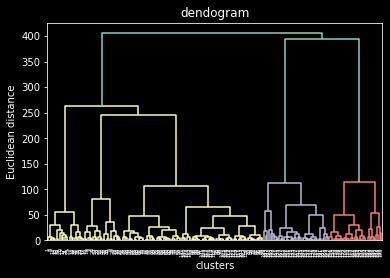

In [26]:
#Dendogram to find the number of clusters
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('dendogram')
plt.xlabel('clusters')
plt.ylabel('Euclidean distance')


# we need the graph for the n clusters
# in the below graph, leave the uppermost line
# search for the line which is not crossing, here its 5 ..so clusters=5
#longest vertival line such that none of the horizontal line passes through it

#'Ward' minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

#'Maximum' or 'complete linkage' minimizes the maximum distance between observations of pairs of clusters.

#'Average linkage' minimizes the average of the distances between all observations of pairs of clusters.

#'Single linkage' minimizes the distance between the closest observations of pairs of clusters.

In [27]:
#implementing Hierarchical clusteing
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

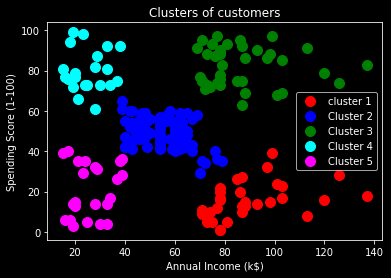

In [28]:
#visualization
#Now we perform visualization
#plt.scatter(X,Y)
#here in X we have, Annual Income (k$) and Spending Score (1-100)
#c-color, s-size,

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1],c='red',s=100,label='cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

#in y_kmeans our clustered formed and stored, so what we have done 
            #X[y_hc == 0, 0]- Annual Income if y_hc==0, give o value
            #X[y_hc == 1, 0]- Annual Income, if y_hc==1, give 0 value
            #X[y_hc == 2, 0]- Annual Income, if y_hc==2, give 0 value
            #X[y_hc == 3, 0]- Annual Income, if y_hc==3, give 0 value
            #X[y_hc == 4, 0]- Annual Income, if y_hc==4, give 0 value
            
          # X[y_hc == 0, 1] - Spending Score (1-100)   if  y_hc==0, give 1 value    
            #X[y_hc == 1, 0]-Spending Score (1-100), if y_hc==1, give 1 value
            #X[y_hc == 2, 0]-Spending Score (1-100), if y_hc==1, give 1 value
            #X[y_hc == 3, 0]- Spending Score (1-100), if y_hc==1, give 1 value
            #X[y_hc == 4, 0]-Spending Score (1-100), if y_hc==1, give 1 value
            
            
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show() 

#### #inferences
### we can infer that cluster 1 has middle to high income  and spends less
### cluster 2 has low middle income and spends medium
### cluster 3 has high income and spends high
### cluster 4 has low income and spends very high
### cluster 5 has low income and spends very less

In [29]:
#metrics
dendogram

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [75.0, 75.0, 101.25, 101.25],
  [60.0, 60.0, 88.125, 88.125],
  [17.5, 17.5, 74.0625, 74.0625],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [142.5, 142.5, 181.25, 181.25],
  [45.78125, 45.78125, 161.875, 161.875],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [237.5, 237.5, 297.5, 297.5],
  [335.0, 33

In [30]:
y_hc
#data['clusters']=y_hc
#data

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

# 3) clustering with DBSCAN(Density Based Spatial Clustering of Applications with Noise)

In [31]:
#Implementing DBSCAN algorithm
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)
model=dbscan.fit(x)
labels=model.labels_
labels

# how many clusters/groups getting
# -1 defines outliers and does not fall on any of the clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [32]:
y_dbscan=dbscan.fit_predict(x)
y_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [33]:
#sample cores
from sklearn import metrics
sample_cores=np.zeros_like(y_dbscan,dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True ##comapre the sample_cores and labels/ymeans
# and where ever the labels/ymeans are True(apart from -1)


#identifying the points whcih makes up our core points
# array as numpy where everything is False

In [35]:
sample_cores 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [36]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_clusters

9

In [37]:
#metrics
print(metrics.silhouette_score(x,y_dbscan)) # here ymeans and labels are same, dont confuse

-0.1908319132560097


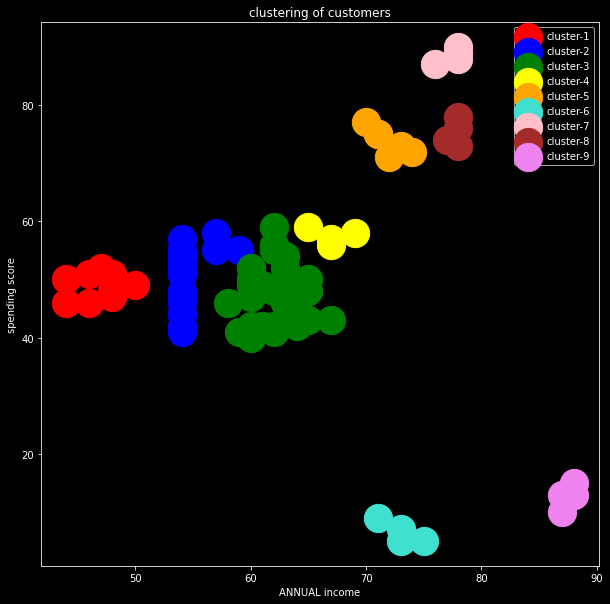

In [39]:
#visualization

plt.figure(figsize=(10,10))
plt.scatter(x[y_dbscan==0,0],x[y_dbscan==0,1],s=800,c='red',label='cluster-1')
plt.scatter(x[y_dbscan==1,0],x[y_dbscan==1,1],s=800,c='blue',label='cluster-2')
plt.scatter(x[y_dbscan==2,0],x[y_dbscan==2,1],s=800,c='green',label='cluster-3')
plt.scatter(x[y_dbscan==3,0],x[y_dbscan==3,1],s=800,c='yellow',label='cluster-4')
plt.scatter(x[y_dbscan==4,0],x[y_dbscan==4,1],s=800,c='orange',label='cluster-5')
plt.scatter(x[y_dbscan==5,0],x[y_dbscan==5,1],s=800,c='turquoise',label='cluster-6')
plt.scatter(x[y_dbscan==6,0],x[y_dbscan==6,1],s=800,c='pink',label='cluster-7')
plt.scatter(x[y_dbscan==7,0],x[y_dbscan==7,1],s=800,c='brown',label='cluster-8')
plt.scatter(x[y_dbscan==8,0],x[y_dbscan==8,1],s=800,c='violet',label='cluster-9')
plt.title('clustering of customers')
plt.xlabel('ANNUAL income')
plt.ylabel('spending score')
plt.legend()
plt.show()

# clustering - observation

### cluster-9: high annual income-high spending score- Target these customers by sending new poduct alerts which would lead to increase in the revenue collected by the mall as they are key customers.

### cluster-6 : low spending score-Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.